<a href="https://colab.research.google.com/github/fazulrehmanm/ChatLLM/blob/main/ViT_introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import timm
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import time

In [2]:


torch.__version__

'2.6.0+cu124'

In [6]:

transform_train = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5), (0.5))]
    # Help model converage faster
    # Matches pretraining conditions
    # Avoids bias in learning
    # Keeps numerical stablility
)

In [7]:

transform_test = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5), (0.5))
])


In [8]:
train_dataset = datasets.CIFAR10(
    root="data", # where to download the data
    train=True,
    download=True, # do you want to download the data yes/no
    transform=transform_train
)

100%|██████████| 170M/170M [00:03<00:00, 48.4MB/s]


In [9]:
test_dataset = datasets.CIFAR10(
    root="data",
    train=False,
    download=True,
    transform=transform_test
)

In [10]:
train_dataset

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: data
    Split: Train
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
               Normalize(mean=0.5, std=0.5)
           )

In [14]:
test_dataset.data.shape

(10000, 32, 32, 3)

In [15]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 64

# Convert our datasets into iterables (batches - batchify our data)
train_loader = DataLoader(dataset=train_dataset,
                          batch_size=BATCH_SIZE,
                          shuffle=True,
                          num_workers=2)

test_loader = DataLoader(dataset=test_dataset,
                         batch_size=BATCH_SIZE,
                         shuffle=False,
                         num_workers=2)

cat


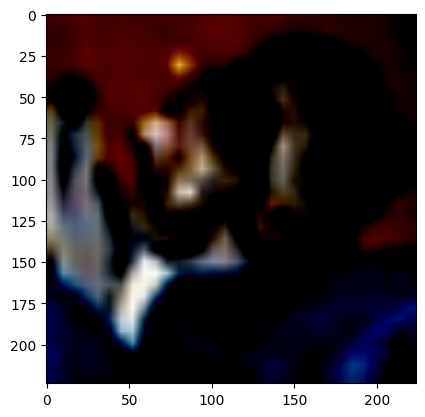

In [44]:
image, label = test_dataset[0]
print(test_dataset.classes[label])
plt.imshow(image.permute(1,2,0))

In [45]:

class_names = train_dataset.classes

In [46]:

def plot_img(img, label):
    img = img / 2 + 0.5 # unnormlizing the image
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis(False)
    plt.title(class_names[label])

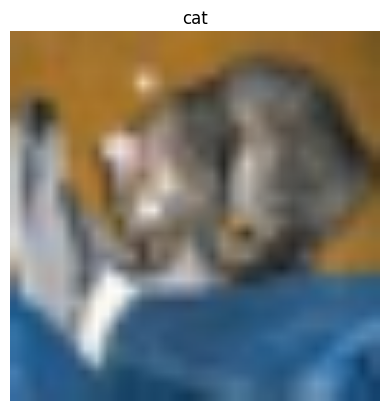

In [47]:

plot_img(image, label);

In [48]:

train_features_batch, train_labels_batch = next(iter(train_loader))
train_features_batch.shape, train_labels_batch.shape


(torch.Size([64, 3, 224, 224]), torch.Size([64]))

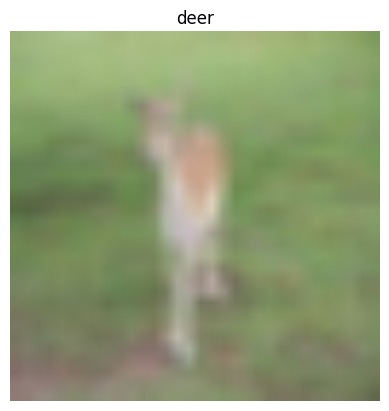

In [49]:

# Visualize one sample from a batch
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plot_img(img, label)

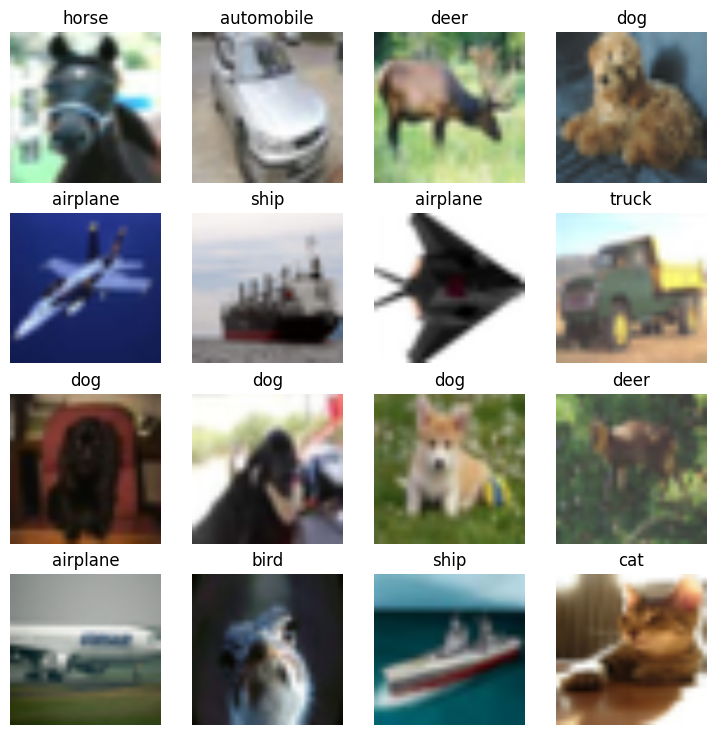

In [50]:
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows*cols+1):
    random_idx = torch.randint(0, len(train_dataset), size=[1]).item()
    fig.add_subplot(rows, cols, i)
    img, label = train_dataset[random_idx]
    plot_img(img, label)

In [51]:
len(class_names)

10